<a href="https://colab.research.google.com/github/ShamikChitale/nba-predictive-modeling/blob/main/nba_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Step1 - Dataset Selection

In [1]:
from google.colab import files
uploaded = files.upload()


Saving nba2021_advanced.csv to nba2021_advanced.csv


In [2]:
from google.colab import files
uploaded = files.upload()


Saving nba2021_per_game.csv to nba2021_per_game.csv


In [3]:
from google.colab import files
uploaded = files.upload()



Saving nba2021_per36min.csv to nba2021_per36min.csv


In [5]:
import pandas as pd

# Load per game stats
df = pd.read_csv('nba2021_per_game.csv')

# Show the first few rows
df.head()



,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,21,MIA,28,2,14.6,2.6,4.4,0.590,...,0.561,1.3,2.7,4.0,0.6,0.4,0.5,1.0,1.9,6.5
1,Jaylen Adams,PG,24,MIL,6,0,2.8,0.2,1.3,0.125,...,0.000,0.0,0.5,0.5,0.3,0.0,0.0,0.0,0.2,0.3
2,Steven Adams,C,27,NOP,27,27,28.1,3.5,5.8,0.603,...,0.468,4.3,4.6,8.9,2.1,1.0,0.6,1.7,1.9,8.0
3,Bam Adebayo,C,23,MIA,26,26,33.6,7.4,12.9,0.573,...,0.841,1.9,7.3,9.2,5.3,1.0,1.0,3.0,2.6,19.9
4,LaMarcus Aldridge,C,35,SAS,18,18,26.7,5.9,12.5,0.476,...,0.762,0.8,3.5,4.3,1.9,0.4,0.9,0.9,1.5,14.1


In [6]:
df_advanced = pd.read_csv('nba2021_advanced.csv')
df_per36 = pd.read_csv('nba2021_per36min.csv')


In [ ]:
#Step 2 - Exploratory Data Analysis (EDA)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the per-game dataset
df = pd.read_csv("nba2021_per_game.csv")

# Basic info
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())

# Summary statistics
df.describe()


Shape: (497, 29)

Columns: ['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

Missing Values:
 Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64


,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,...,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000
mean,25.623742,18.456740,8.631791,19.724547,3.274447,7.157948,0.437322,1.018712,2.816097,0.300738,...,0.692213,0.808451,2.826559,3.632797,2.035010,0.609658,0.421932,1.139437,1.654728,8.962777
std,4.054229,8.311394,10.318088,9.892146,2.478254,5.068286,0.128347,0.942945,2.332628,0.163417,...,0.251333,0.769720,1.940002,2.519695,1.986807,0.427091,0.439783,0.887715,0.844111,6.885621
min,19.000000,1.000000,0.000000,1.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,12.000000,0.000000,11.200000,1.400000,3.200000,0.389000,0.200000,0.800000,0.250000,...,0.619000,0.300000,1.300000,1.800000,0.700000,0.300000,0.100000,0.500000,1.000000,3.700000
50%,25.000000,20.000000,3.000000,19.800000,2.700000,6.000000,0.443000,0.800000,2.300000,0.337000,...,0.759000,0.600000,2.600000,3.200000,1.400000,0.600000,0.300000,0.900000,1.700000,7.300000
75%,28.000000,26.000000,18.000000,28.100000,4.700000,10.300000,0.500000,1.600000,4.300000,0.396000,...,0.848000,1.100000,3.800000,5.000000,2.700000,0.900000,0.600000,1.500000,2.200000,12.800000
max,37.000000,30.000000,30.000000,38.300000,11.400000,24.000000,1.000000,5.000000,11.800000,1.000000,...,1.000000,4.600000,9.900000,14.000000,11.800000,2.000000,3.500000,5.000000,4.100000,32.800000


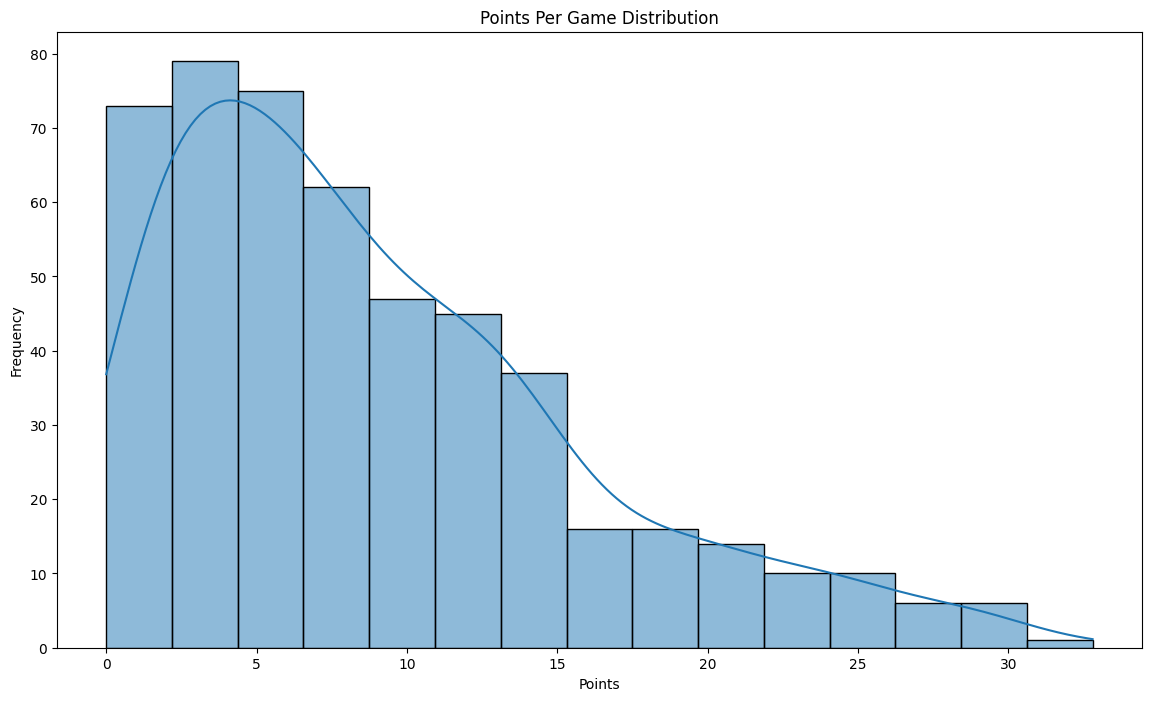

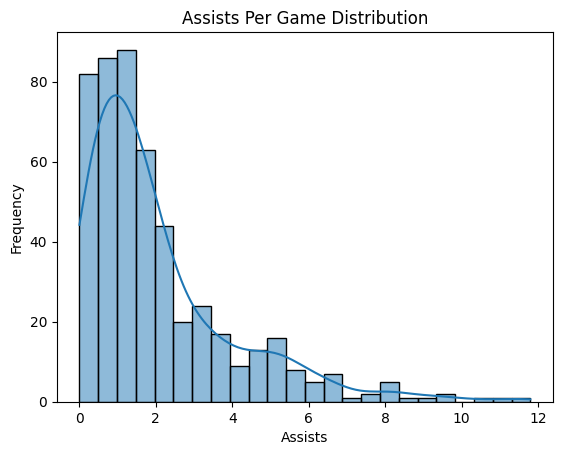

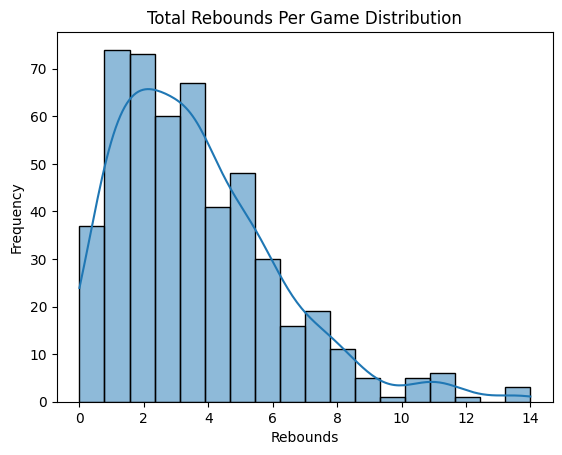

In [9]:
plt.figure(figsize=(14, 8))

sns.histplot(df['PTS'], kde=True)
plt.title("Points Per Game Distribution")
plt.xlabel("Points")
plt.ylabel("Frequency")
plt.show()

sns.histplot(df['AST'], kde=True)
plt.title("Assists Per Game Distribution")
plt.xlabel("Assists")
plt.ylabel("Frequency")
plt.show()

sns.histplot(df['TRB'], kde=True)
plt.title("Total Rebounds Per Game Distribution")
plt.xlabel("Rebounds")
plt.ylabel("Frequency")
plt.show()


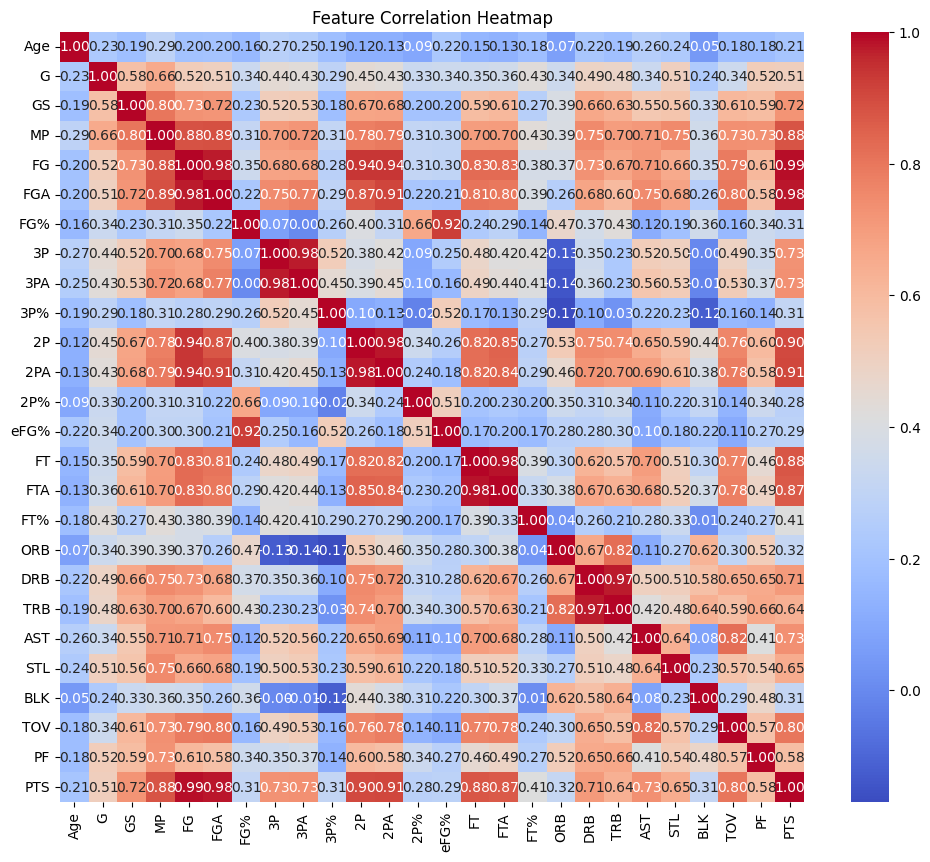

In [10]:
plt.figure(figsize=(12, 10))
numeric = df.select_dtypes(include='number')
sns.heatmap(numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


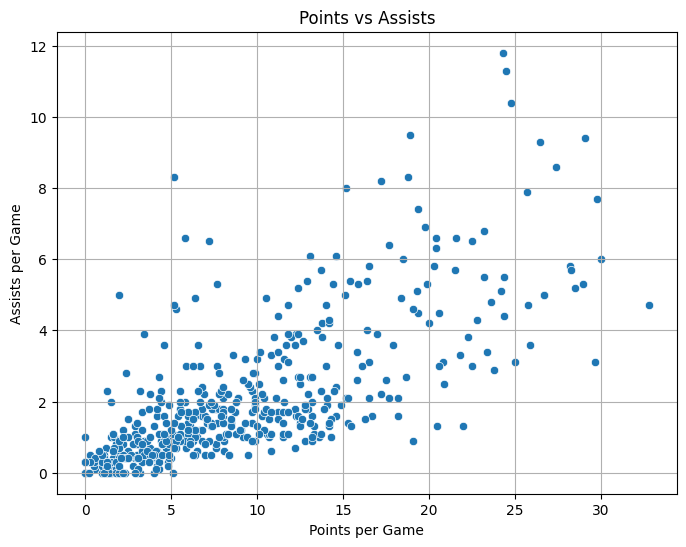

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PTS', y='AST')
plt.title('Points vs Assists')
plt.xlabel('Points per Game')
plt.ylabel('Assists per Game')
plt.grid(True)
plt.show()


In [11]:
#Step 3 - Data Cleaning and Preprocessing

In [12]:
# Check missing values
missing = df.isnull().sum()
print("Missing values:\n", missing[missing > 0])

# Drop rows with missing values (or choose to fill if more appropriate)
df = df.dropna()

# Confirm no missing values remain
print("\nRemaining missing values:", df.isnull().sum().sum())


Missing values:
 Series([], dtype: int64)

Remaining missing values: 0


In [13]:
# Drop non-numeric or identifier columns
df_cleaned = df.drop(columns=['Rk', 'Player', 'Pos', 'Tm'], errors='ignore')


In [14]:
# Optional: remove outliers using IQR for a few columns
numeric_cols = df_cleaned.select_dtypes(include='number').columns

Q1 = df_cleaned[numeric_cols].quantile(0.25)
Q3 = df_cleaned[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df_cleaned = df_cleaned[~((df_cleaned[numeric_cols] < (Q1 - 1.5 * IQR)) |
                          (df_cleaned[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cleaned)

# Optional: convert back to DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=df_cleaned.columns)


In [16]:
from sklearn.model_selection import train_test_split

# For example: predict Points Per Game using all other stats
X = df_scaled.drop(columns=['PTS'])
y = df_scaled['PTS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (247, 25)
Test shape: (62, 25)


In [17]:
#Step 4
#Questions - Which player performance metrics are most predictive of points per game (PTS)?
#Can we identify undervalued players who outperform their expected metrics?
#How can player efficiency be predicted based on per-game statistics?


In [ ]:
#Step 5 - Predictive Modeling

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Features (X) and Target (y)
X = df_scaled.drop(columns=['PTS'])
y = df_scaled['PTS']

# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
#Model 1: Linear Regression
from math import sqrt

# Linear Regression Metrics
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)



In [23]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and fit model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Random Forest Metrics
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)


In [25]:
print("Linear Regression Results:")
print("RMSE:", lr_rmse)
print("MAE:", lr_mae)
print("R²:", lr_r2)

print("\nRandom Forest Results:")
print("RMSE:", rf_rmse)
print("MAE:", rf_mae)
print("R²:", rf_r2)


Linear Regression Results:
RMSE: 0.015338018016301183
MAE: 0.011023015272971047
R²: 0.9997975105073817

Random Forest Results:
RMSE: 0.1235504585287189
MAE: 0.0967005859570081
R²: 0.9868612899646912


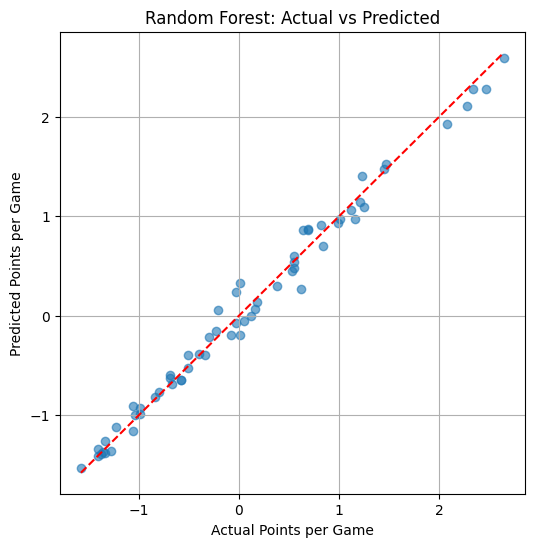

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.xlabel("Actual Points per Game")
plt.ylabel("Predicted Points per Game")
plt.title("Random Forest: Actual vs Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Diagonal line
plt.grid(True)
plt.show()
